<a href="https://colab.research.google.com/github/Nina-pinheiro/Data-Science-Python/blob/master/cluster2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importando as Bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn.cluster import KMeans
import plotly as py
warnings.filterwarnings("ignore")
py.offline.init_notebook_mode(connected = True)


In [ ]:
#Carregando a base de dados: Instanciou falar que é igual

data = pd.read_csv("pokemon.csv")

# Verificar as 5 primeiras linhas head é método(funcao) do pandas recebe parametro que é um numero inteiro

data.head()

# Verificar o volume dos dados shape é um atributo pq nao tem parametros 

data.shape

# Análise descritiva

data.describe()

# Verificar os tipos de dados

data.dtypes

# Verificando os registros nulos dois metodos is null - quantos nulos tem (é nulo ou nao é - bolleano true = 1 false = 0)

data.isnull().sum()





#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [ ]:
data.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [ ]:
data.corr()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,1.000000,0.119813,0.097614,0.102298,0.094786,0.088759,0.085817,0.010733,0.982516,0.153396
Total,0.119813,1.000000,0.618748,0.736211,0.612787,0.747250,0.717609,0.575943,0.048384,0.501758
HP,0.097614,0.618748,1.000000,0.422386,0.239622,0.362380,0.378718,0.175952,0.058683,0.273620
Attack,0.102298,0.736211,0.422386,1.000000,0.438687,0.396362,0.263990,0.381240,0.051451,0.345408
Defense,0.094786,0.612787,0.239622,0.438687,1.000000,0.223549,0.510747,0.015227,0.042419,0.246377
Sp. Atk,0.088759,0.747250,0.362380,0.396362,0.223549,1.000000,0.506121,0.473018,0.036437,0.448907
Sp. Def,0.085817,0.717609,0.378718,0.263990,0.510747,0.506121,1.000000,0.259133,0.028486,0.363937
Speed,0.010733,0.575943,0.175952,0.381240,0.015227,0.473018,0.259133,1.000000,-0.023121,0.326715
Generation,0.982516,0.048384,0.058683,0.051451,0.042419,0.036437,0.028486,-0.023121,1.000000,0.079794
Legendary,0.153396,0.501758,0.273620,0.345408,0.246377,0.448907,0.363937,0.326715,0.079794,1.000000


In [ ]:
# Removendo a coluna Type 2, pois tem muito 0 e variáveis categoricas
# instanciou sofrendo um drop , uma boa pratica deixaxr o data organizado

data_remover = data.drop(columns=['Name','Type 2','Generation','Legendary','Type 1', 'Total','#'])

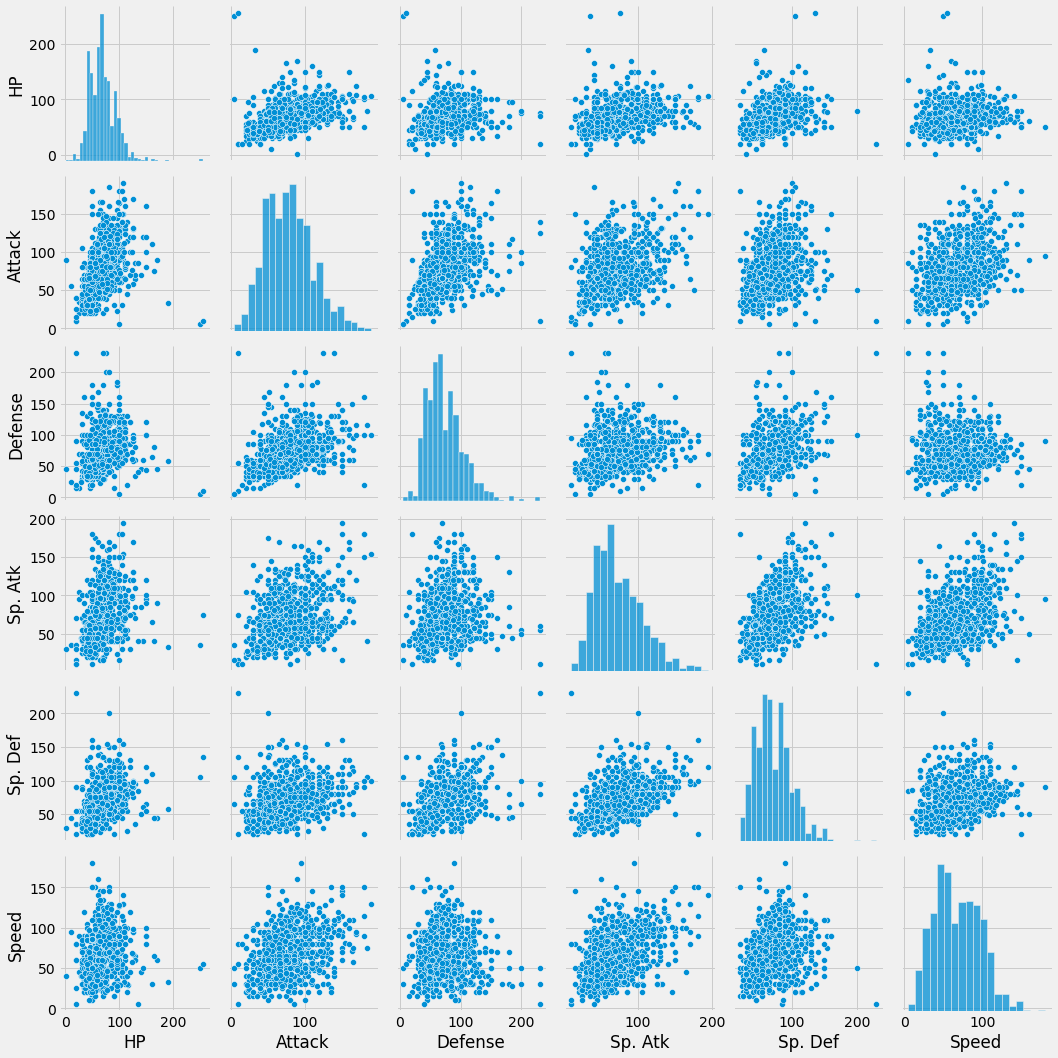

In [ ]:
# Verificar a correlação entre as variáveis - Ajuda a definir a melhor técnica

sns.pairplot(data_remover[['HP','Attack','Defense','Sp. Atk','Sp. Def','Speed']])
plt.show()

# Definindo um estilo para os gráficos:
plt.style.use('fivethirtyeight')

In [ ]:
data[data['HP']<10]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
316,292,Shedinja,Bug,Ghost,236,1,90,45,30,30,40,3,False


In [ ]:
# Figsize é o tamanho em polegadas ( largura, altura) figure é um metodo da classe plt 
plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in [ 'HP' , 'Attack','Defense','Speed','Sp. Def','Sp. Atk']:
    n += 1
    plt.subplot(1 , 6 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(data_remover[x] , bins = 25)
    plt.title('{} '.format(x))
plt.show()

In [ ]:
# Normalizar as variáveis de 0 a 1 fit aprende, transform para aplicar
min_max_scaler = preprocessing.MinMaxScaler()
variaveis_normalizadas = min_max_scaler.fit_transform(data_remover)

Text(0, 0.5, 'Inertia - SSE- Erro')

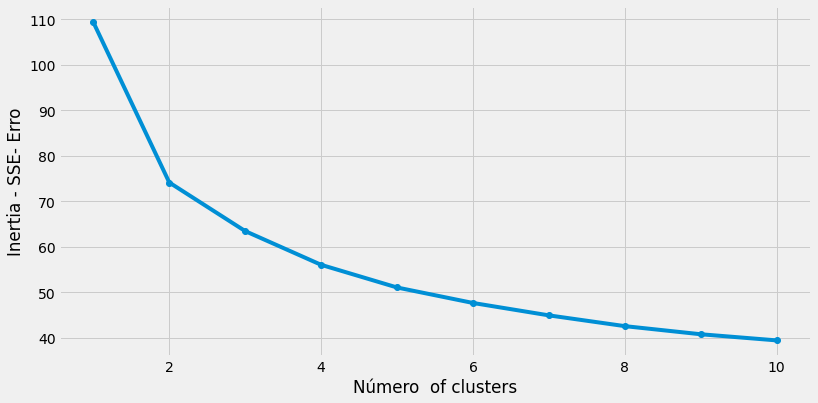

In [ ]:
# Realizando o método do cotovelo Ebbow para descobrir o número de cluster
SSE = []
for cluster in range(1,11):
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(variaveis_normalizadas)
    SSE.append(kmeans.inertia_)

#Converte o conjunto do dataframe em um gráfico
frame = pd.DataFrame({'Cluster':range(1,11), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Número  of clusters')
plt.ylabel('Inertia - SSE- Erro')





In [ ]:
SSE

[109.35040105115625,
 74.13604818718562,
 63.45403085632634,
 56.04332318126073,
 51.06146020056025,
 47.660498615518534,
 44.93309596389118,
 42.569006315268396,
 40.78366010210543,
 39.435092265465045]

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
for cluster in range(2,11):
    clusterer = KMeans(n_clusters = cluster)
    preds = clusterer.fit_predict(data_remover)
    centers = clusterer.cluster_centers_

    score = silhouette_score(data_remover, preds)
    print("For n_clusters = {}, silhouette score is {})".format(cluster, score))

In [ ]:
# Realizando o algoritmo k-means, escolhendo os parâmetros, k-means++ tem uma maior eficiência do que o parâmetro de aleatoriedade
kmeans = KMeans(n_clusters = 2, init = 'k-means++')
cluster = kmeans.fit_predict(variaveis_normalizadas)



In [ ]:
# Centroides
C = kmeans.cluster_centers_

In [ ]:
C

array([[0.21829452, 0.28404255, 0.23121749, 0.22828978, 0.16566616,
        0.2687386 ],
       [0.31346568, 0.50284294, 0.37225367, 0.4417299 , 0.31941824,
        0.44392183]])

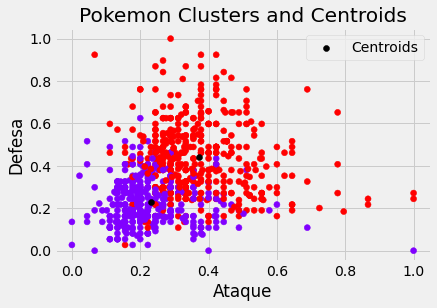

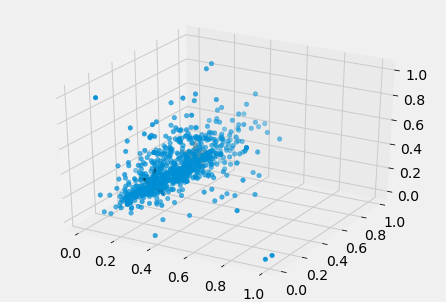

In [ ]:
# Plotando o gráfico

plt.scatter(variaveis_normalizadas[:,2],variaveis_normalizadas[:,3], c = cluster, cmap = 'rainbow')
plt.scatter(C[:,2] ,C[:,3], color='black', label = 'Centroids')

plt.title('Pokemon Clusters and Centroids')
plt.xlabel('Ataque')
plt.ylabel('Defesa')
plt.legend()

plt.show()


# Plotando o gráfico 3D para 3 variáveis

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(variaveis_normalizadas[:, 0], variaveis_normalizadas[:, 1], variaveis_normalizadas[:, 2])
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c='#050505', s=1000)

In [ ]:
# Criando nova coluna
data_remover['Clusters'] = cluster

In [ ]:
data_remover.query("Clusters == 0")

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Clusters
0,45,49,49,65,65,45,0
1,60,62,63,80,80,60,0
4,39,52,43,60,50,65,0
5,58,64,58,80,65,80,0
9,44,48,65,50,64,43,0
...,...,...,...,...,...,...,...
781,44,66,70,44,55,56,0
782,54,66,70,44,55,46,0
783,59,66,70,44,55,41,0
788,55,69,85,32,35,28,0


In [ ]:
cluster_0 = data.query("Clusters == 0")
cluster_1 = data.query("Clusters == 1")

In [ ]:
data

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Clusters
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,0
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,0
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,1
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,1
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True,1
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True,1
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True,1
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True,1


In [ ]:
cluster_0.describe()
cluster_1.describe()

In [ ]:
cluster_0.describe() - cluster_1.describe()

In [ ]:
data_remover['Clusters'].value_counts()

1    424
0    376
Name: Clusters, dtype: int64

In [ ]:
data.to_csv('data_pokemon.csv')